In [87]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
original_data = pd.read_excel('../Data/find_my_buddy.csv.xlsx', sheet_name='Buddy Sheet')

### What information do we have?

In [49]:
type(original_data)

pandas.core.frame.DataFrame

In [4]:
print(original_data.columns)

Index(['Full Name', 'Email address', 'Gender', 'Hometown',
       'Currently living in ', 'Your Decision', 'Looking for a room mate?',
       'Course ',
       'Please Enter your Branch (If it was not listed in drop down, else leave blank)',
       'Are you open to other branch room mate?',
       'Areas of Interest (In NEU )', 'University Name (UG)',
       'Work experience (In years)',
       'Approximate distance from University (in miles)',
       'Person per room including you ( select all that applies)',
       'Apartment type', 'Can afford a monthly rent  of (Per person)',
       'Facilities required ', 'Alcohol consumption', 'Smoking',
       'Any special preferences for room mates ?', 'Food preference',
       'Culinary skills ', 'I am looking for a room mate', 'Your Hobbies',
       'Facebook profile link (optional)', 'i20 amount', 'VISA status',
       'Planned VISA interview date', 'VISA consulate - city ',
       'Do you need a Flight mate?', 'If yes, then Flight Date?',
 

### Do some of the features make any difference?

In [5]:
original_data['Any other comments  ?']

0                                                    NaN
1                                         Go Huskies..!!
2                                                    NaN
3                                 Looking for roommates.
4                                                    NaN
5                                                    NaN
6                                                    NaN
7      Need a room for self, willing to share the fla...
8                                                    NaN
9                                                    NaN
10                                                   NaN
11                                                   NaN
12                                                   NaN
13                                                   NaN
14                                                     I
15                                                   NaN
16                                                   NaN
17                             

Dropping columns which intuitively dont make a difference right now.
'Email address'
'Your Decision'
'Areas of Interest (In NEU )'
'Facebook profile link (optional)'
'i20 amount'
'VISA status'
'Planned VISA interview date'
'VISA consulate - city '
'Do you need a Flight mate?', 'If yes, then Flight Date?'
'Any other comments  ?'
'Any other comments  ?'

In [6]:
original_data = original_data.drop(labels = [ 'i20 amount', 'VISA status', 'Planned VISA interview date', 'VISA consulate - city ',
       'Do you need a Flight mate?', 'If yes, then Flight Date?',
       'Any other comments  ?', 'Email address', 'Your Decision', 'Areas of Interest (In NEU )', 'Facebook profile link (optional)'], axis = 1)

In [7]:
original_data

Full Name  Gender          Hometown  \
0                        Sachin Haldavanekar    Male            Mumbai   
1                              Sanket Saurav    Male             Patna   
2                                 Viha Bidre  Female        Davanagere   
3                            Sougata Dafader    Male           Kolkata   
4                         Athul Muralidharan    Male           Chennai   
5                             Megha Suvarna   Female        Mangalore    
6                                     Vishnu    Male         Nileshwar   
7                           Srashti Kasliwal  Female            Indore   
8                                Balakumaran    Male        Bangalore    
9                                     Pranav    Male              Pune   
10                      Harshil Navin Dhruve    Male         Bangalore   
11                      Shravan kumar reddy     Male         Hyderabad   
12                              Tejas Harish    Male         Bangalore   
13                               Rohan Taori    Male         Amravati    
14                                         Z  Female                 D   
15                            Mrunal Ghanwat  Female              Pune   
16                 Varun Sundar Rabindranath    Male           Chennai   
17                        Kaustubh Shivdikar    Male            Mumbai   
18                            Pratik Devikar    Male            Nagpur   
19                              Saumil Patel    Male          Vadodara   
20                        Keerthan Bharadwaj    Male         Bangalore   
21                                  Sreejith    Male             Kochi   
22                           Rushaabh Saliya    Male            Mumbai   
23                          Srinidhi Shankar    Male         Bangalore   
24                               Harsh Sheth    Male            Mumbai   
25                               Nipun Midha    Male             Sirsa   
26                                     Varad    Male              Pune   
27                           Chaitanya Joshi    Male            Mumbai   
28                             Cyril Mathew     Male              Pune   
29                                  VYOM RAJ    Male           LUCKNOW   
..                                       ...     ...               ...   
493                          Mihir Raichura     Male           Nagpur    
494                            Manva Pradhan  Female          VADODARA   
495                           Nikunj Kotecha    Male            Mumbai   
496                          Akash Tripathi     Male                UP   
497                          Akshat Karambe     Male            Mumbai   
498  Shyama Sastha Krishnamoorthy Srinivasan    Male           Chennai   
499                       Ashutosh Ghildiyal    Male          Dehradun   
500                             Ayush Shukla    Male            Indore   
501                             KANDARP VYAS    Male          VADODARA   
502                    Sai Praneeth Macherla    Male         Hyderabad   
503                             Dhruv Sharma    Male  Himachal Pradesh   
504                           Patel Parth B.    Male           Mehsana   
505                            Nishita Sikka  Female         Jalandhar   
506                               Shiv Desai    Male             Surat   
507                              Dhruv Patel    Male            Mumbai   
508                            Siddhika Alve  Female            Mumbai   
509                                   Mayank    Male            Indore   
510                              Ajit Manuel    Male           Chennai   
511                          Abishek Sampath    Male             Hosur   
512                           Vikram Aditya     Male         Hyderabad   
513                 Saran Prasad Ambikapathy    Male           Chennai   
514                     Parmeet Singh Saluja    Male            Indore   
515                     Raghavan Rengan

### Dont drop names. Keep it for recommendations later.

## Start categorizing variables

#### Male, Female to 0, 1

In [8]:
original_data['Gender'].replace(['Male','Female'], [0, 1], inplace = True)

In [9]:
original_data = original_data.drop(['Facilities required '], axis = 1)

In [10]:
original_data.columns

Index(['Full Name', 'Gender', 'Hometown', 'Currently living in ',
       'Looking for a room mate?', 'Course ',
       'Please Enter your Branch (If it was not listed in drop down, else leave blank)',
       'Are you open to other branch room mate?', 'University Name (UG)',
       'Work experience (In years)',
       'Approximate distance from University (in miles)',
       'Person per room including you ( select all that applies)',
       'Apartment type', 'Can afford a monthly rent  of (Per person)',
       'Alcohol consumption', 'Smoking',
       'Any special preferences for room mates ?', 'Food preference',
       'Culinary skills ', 'I am looking for a room mate', 'Your Hobbies'],
      dtype='object')

### Change names to more accessible ones

In [11]:
original_data.columns = ['name','gender', 'hometown', 'current_city',
       'need_roommate', 'course',
       'edu_prog',
       'open_to_other_branch', 'undergrad_uni',
       'work_ex',
       'dist_from_uni',
       'person_per_room',
       'apt_type', 'rent_budget',
       'alcohol', 'smoking',
       'special_pref', 'food_pref',
       'cul_skills ', 'looking_for_roommate', 'hobbies']

In [12]:
original_data = original_data.drop(['edu_prog'], axis = 1)

###  Start exploring each column and encoding them wherever needed

###  1) Course

In [13]:
original_data.course.unique()

array(['MS Computer Science', 'MS Engineering Management', 'Others',
       'MS Civil Engineering', 'MS Electrical and Computer Engineering',
       'MS Energy Systems', 'MS Information Systems',
       'MS Information Assurance and Cyber Security', 'MS Data Science',
       'MS Mechanical Engineering', 'MS Computer Systems Engineering',
       nan, 'MS Industrial Engineering', 'MS Biotechnology',
       'MS Project Management'], dtype=object)

In [14]:
one_hot_course = pd.get_dummies(original_data['course'])

In [15]:
# Join one hot vectors of course and delete original
original_data = original_data.join(one_hot_course)

original_data = original_data.drop('course', axis = 1)

In [16]:
# Drop one vague reading
original_data = original_data.drop(522)

In [17]:
original_data

name  gender          hometown  \
0                        Sachin Haldavanekar       0            Mumbai   
1                              Sanket Saurav       0             Patna   
2                                 Viha Bidre       1        Davanagere   
3                            Sougata Dafader       0           Kolkata   
4                         Athul Muralidharan       0           Chennai   
5                             Megha Suvarna        1        Mangalore    
6                                     Vishnu       0         Nileshwar   
7                           Srashti Kasliwal       1            Indore   
8                                Balakumaran       0        Bangalore    
9                                     Pranav       0              Pune   
10                      Harshil Navin Dhruve       0         Bangalore   
11                      Shravan kumar reddy        0         Hyderabad   
12                              Tejas Harish       0         Bangalore   
13                               Rohan Taori       0         Amravati    
14                                         Z       1                 D   
15                            Mrunal Ghanwat       1              Pune   
16                 Varun Sundar Rabindranath       0           Chennai   
17                        Kaustubh Shivdikar       0            Mumbai   
18                            Pratik Devikar       0            Nagpur   
19                              Saumil Patel       0          Vadodara   
20                        Keerthan Bharadwaj       0         Bangalore   
21                                  Sreejith       0             Kochi   
22                           Rushaabh Saliya       0            Mumbai   
23                          Srinidhi Shankar       0         Bangalore   
24                               Harsh Sheth       0            Mumbai   
25                               Nipun Midha       0             Sirsa   
26                                     Varad       0              Pune   
27                           Chaitanya Joshi       0            Mumbai   
28                             Cyril Mathew        0              Pune   
29                                  VYOM RAJ       0           LUCKNOW   
..                                       ...     ...               ...   
492                          Harshad Sathaye       0              Pune   
493                          Mihir Raichura        0           Nagpur    
494                            Manva Pradhan       1          VADODARA   
495                           Nikunj Kotecha       0            Mumbai   
496                          Akash Tripathi        0                UP   
497                          Akshat Karambe        0            Mumbai   
498  Shyama Sastha Krishnamoorthy Srinivasan       0           Chennai   
499                       Ashutosh Ghildiyal       0          Dehradun   
500                             Ayush Shukla       0            Indore   
501                             KANDARP VYAS       0          VADODARA   
502                    Sai Praneeth Macherla       0         Hyderabad   
503                             Dhruv Sharma       0  Himachal Pradesh   
504                           Patel Parth B.       0           Mehsana   
505                            Nishita Sikka       1         Jalandhar   
506                               Shiv Desai       0             Surat   
507                              Dhruv Patel       0            Mumbai   
508                            Siddhika Alve       1            Mumbai   
509                                   Mayank       0            Indore   
510                              Ajit Manuel       0           Chennai   
511                          Abishek Sampath       0             Hosur   
512                           Vikram Aditya        0         Hyderabad   
513                 Saran Prasad Ambikapathy       0           Chennai   
514                     Parmeet Singh Saluja

### 2) Hometown and current city

In [18]:
original_data['hometown'] = original_data['hometown'].str.strip().str.lower()
original_data['current_city'] = original_data['current_city'].str.strip().str.lower()

In [19]:
print('Proportion of people currently in the same city as their hometown:')
np.sum(original_data['hometown'] == original_data['current_city'])/len(original_data)

Proportion of people currently in the same city as their hometown:


0.6053639846743295

### 3) Undergrad universities

In [20]:
original_data['undergrad_uni'] = original_data['undergrad_uni'].str.strip().str.lower()

In [21]:
pd.value_counts(original_data['undergrad_uni'])

mumbai university                                                         55
vtu                                                                       19
pune university                                                           12
university of mumbai                                                      12
university of pune                                                         6
vjti                                                                       6
anna university                                                            5
manipal institute of technology                                            4
gujarat technological university                                           3
gtu                                                                        3
nmims                                                                      3
nagpur university                                                          3
kiit university                                                            3

In [22]:
mask = original_data.undergrad_uni.str.contains('mumbai')

In [23]:
mask

0       True
1      False
2      False
3      False
4      False
5        NaN
6      False
7        NaN
8      False
9        NaN
10     False
11     False
12       NaN
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20       NaN
21     False
22      True
23     False
24       NaN
25     False
26       NaN
27       NaN
28     False
29     False
       ...  
492      NaN
493    False
494    False
495      NaN
496     True
497      NaN
498    False
499    False
500      NaN
501    False
502      NaN
503    False
504    False
505    False
506      NaN
507      NaN
508      NaN
509    False
510      NaN
511    False
512      NaN
513    False
514      NaN
515      NaN
516      NaN
517    False
518    False
519      NaN
520      NaN
521      NaN
Name: undergrad_uni, Length: 522, dtype: object

In [24]:
new_unis = np.array(original_data['undergrad_uni'])

In [25]:
# List of universities
new_unis

array(['mumbai university', 'vtu',
       'dr. ambedkar institute of technology.', 'wbut', 'srm university',
       nan, 'msrit', nan, 'government college of technology', nan, 'vtu',
       'jntu', nan,
       'shri ramdeobaba college of engineering and management', 'h', 'pu',
       'madras institute of technology', 'vjti', 'nagpur university',
       'svit, vasad, gujarat (gtu', nan,
       'toc h institute of science and technology', 'mumbai university',
       'pesit south campus, vtu', nan, 'mdu', nan, nan, 'vit pune',
       'national  institute of technology raipur', nan,
       'biju patnaik university of technology', 'nagpur university',
       'nit trichy', 'vit vellore', 'mumbai university', nan, nan,
       'sri bhagawan mahaveer jain college of engineering',
       'dharmsinh desai university', 'maharishi dayanand university',
       'bits pilani, goa campus', 'jntu', nan, 'mumbai', 'sgbau amravati',
       'mumbai university',
       'indian institute of technology, bhuba

In [26]:
# Dataframe of observations where theres any NA value anywhere.
original_data[original_data.isnull().any(axis=1)]

name  gender     hometown  \
0                        Sachin Haldavanekar       0       mumbai   
2                                 Viha Bidre       1   davanagere   
5                             Megha Suvarna        1    mangalore   
6                                     Vishnu       0    nileshwar   
7                           Srashti Kasliwal       1       indore   
8                                Balakumaran       0    bangalore   
9                                     Pranav       0         pune   
10                      Harshil Navin Dhruve       0    bangalore   
11                      Shravan kumar reddy        0    hyderabad   
12                              Tejas Harish       0    bangalore   
13                               Rohan Taori       0     amravati   
15                            Mrunal Ghanwat       1         pune   
16                 Varun Sundar Rabindranath       0      chennai   
17                        Kaustubh Shivdikar       0       mumbai   
18                            Pratik Devikar       0       nagpur   
19                              Saumil Patel       0     vadodara   
20                        Keerthan Bharadwaj       0    bangalore   
22                           Rushaabh Saliya       0       mumbai   
23                          Srinidhi Shankar       0    bangalore   
24                               Harsh Sheth       0       mumbai   
25                               Nipun Midha       0        sirsa   
26                                     Varad       0         pune   
27                           Chaitanya Joshi       0       mumbai   
28                             Cyril Mathew        0         pune   
29                                  VYOM RAJ       0      lucknow   
30                                Bharathwaj       0      chennai   
31                               Sibendu Dey       0      kolkata   
34                      Samruddhi Pai Kakode       1   margao goa   
35                             Gaurav Gandhi       0       mumbai   
36                  VENKATA SAI TARUN UPPALA       0    hyderabad   
..                                       ...     ...          ...   
487                           varun adhithya       0      chennai   
488                     Hemanth Senthilkumar       0   coimbatore   
489                           Pranav walimbe       0       mumbai   
491                                       zz       0           zz   
492                          Harshad Sathaye       0         pune   
493                          Mihir Raichura        0       nagpur   
495                           Nikunj Kotecha       0       mumbai   
496                          Akash Tripathi        0           up   
497                          Akshat Karambe        0       mumbai   
498  Shyama Sastha Krishnamoorthy Srinivasan       0      chennai   
499                       Ashutosh Ghildiyal       0     dehradun   
500                             Ayush Shukla       0       indore   
501                             KANDARP VYAS       0     vadodara   
502                    Sai Praneeth Macherla       0    hyderabad   
504                           Patel Parth B.       0      mehsana   
506                               Shiv Desai       0        surat   
507                              Dhruv Patel       0       mumbai   
508                            Siddhika Alve       1       mumbai   
509                                   Mayank       0       indore   
510                              Ajit Manuel       0      chennai   
512                           Vikram Aditya        0    hyderabad   
513                 Saran Prasad Ambikapathy       0      chennai   
514                     Parmeet Singh Saluja       0       indore   
515                     Raghavan Renganathan       0    thanjavur   
516                      Ananth Kumar Shetty       0    mangalore   
517                      Ankur Bambharoliya        0       rajkot   
518                            Sanket 

In [27]:
# Second most popular city after Mumbai is Bangalore
original_data[original_data['current_city'] == 'bangalore']

name  gender                 hometown  \
1                              Sanket Saurav       0                    patna   
2                                 Viha Bidre       1               davanagere   
6                                     Vishnu       0                nileshwar   
12                              Tejas Harish       0                bangalore   
20                        Keerthan Bharadwaj       0                bangalore   
23                          Srinidhi Shankar       0                bangalore   
31                               Sibendu Dey       0                  kolkata   
38                              Abhinn Ankit       0                    patna   
50                            Prashant Reddy       0               kalaburagi   
51                    Poojith Shankar Shetty       0          udupi karnataka   
52                            Prashant Reddy       0               kalaburagi   
56                                   Sumanth       0                bangalore   
61                    Elavazhagan Sethuraman       0                thanjavur   
64                              Tanmay Sinha       0                    delhi   
66                            KAVYA PRAKASH        1                bangalore   
69                     Vishnu Prasad Maruthi       0                bangalore   
70                                Nupur jain       1                bangalore   
73                           Chetan M Jadhav       0                 gulbarga   
77                      Punith Narayanaswamy       0                bangalore   
81                    Pavithran Ramachandran       0              pondicherry   
88                              Jhalak Gupta       1                  lucknow   
89                         Kavitha Sivakumar       1                tamilnadu   
92                           Roshan P Shajan       0  thrissur, kerala, india   
104                       Pradeepa Gopinath        0                bangalore   
107                                   Monica       1            uttar pradesh   
110                           Vinyas kaushik       0                bangalore   
129                 Sangeetha Chandrashekar        1                bangalore   
133                         Soumyadeep sinha       0                  kolkata   
143                         Akhilesh Hegde I       0                bangalore   
145                            Kousthubh B S       0                bangalore   
..                                       ...     ...                      ...   
281                            Vikram Ramesh       0                bangalore   
283                            Sakshi Tonwer       1                    delhi   
286                             Nityashree V       1                bangalore   
294               Manasa Bhimaraya Singhekar       1                bangalore   
297                             jhalak gupta       1                  lucknow   
319                     Sheela Sathyanrayana       1                   mysore   
324                        Omair Shafi Ahmed       0                bangalore   
329                            Harshit Gupta       0                   meerut   
335                                   Ankush       0                bangalore   
339                         Nikhil Upadhyaya       0                mangalore   
360                            Lohith Shetty       0              sakaleshpur   
362                        Anupam Maheshwari       0                ghaziabad   
369                            Bhagyashree A       1                   mumbai   
376                            Aditya Prabhu       0                bangalore   
378                              Shyam Padia       0                   rajkot   
381                             Sameer Desai       0                bangalore   
400                                   Lohith       0              sakaleshpur   
406                          Shreyas Krishna       0                ban

In [28]:
print("Counts of NA's in every feature:")
original_data.isnull().sum()

Counts of NA's in every feature:


name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             9
undergrad_uni                                  138
work_ex                                          9
dist_from_uni                                    9
person_per_room                                  9
apt_type                                         9
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology               

### 4) Open to roommates from other branch

In [29]:
pd.value_counts(original_data['open_to_other_branch'])

Yes    477
No      36
Name: open_to_other_branch, dtype: int64

In [30]:
# Fill NA's with the most frequent value
original_data.open_to_other_branch = original_data.open_to_other_branch.fillna('Yes')

In [31]:
# Check nulls now
original_data.open_to_other_branch.isnull().sum()

0

### 5) Undergrad university

In [32]:
original_data.undergrad_uni.value_counts()

mumbai university                                                         55
vtu                                                                       19
pune university                                                           12
university of mumbai                                                      12
university of pune                                                         6
vjti                                                                       6
anna university                                                            5
manipal institute of technology                                            4
gujarat technological university                                           3
gtu                                                                        3
nmims                                                                      3
nagpur university                                                          3
kiit university                                                            3

In [33]:
'''This feature is too messy right now cause people were allowed to manually write into this. 
So too many variations for the same universities like people repeating names, using abbreviations etc.
Can let go of this bias because hometown and current city capture this information already.'''
original_data = original_data.drop(labels=['undergrad_uni'], axis = 1)

In [34]:
original_data.isnull().sum()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          9
dist_from_uni                                    9
person_per_room                                  9
apt_type                                         9
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering           

### 6) Work experience
This is crucial since this data does not contain age as a feature. Years of work experience+22(avg graduation age) can indicate age of users.

In [35]:
original_data.work_ex.value_counts()

0.000    177
2.000     75
1.000     52
3.000     32
1.500     22
2.500     18
5.000     12
1.800     11
0.500     10
3.500      9
0.600      7
2.600      6
1.700      6
2.800      6
0.700      5
4.000      5
0.800      5
0.300      4
0.900      4
6.000      4
0.400      3
1.400      3
2.700      3
2.400      3
1.600      3
2.200      3
3.800      2
9.000      2
0.750      2
1.100      2
4.500      2
2.100      2
3.600      1
1.300      1
0.200      1
6.500      1
1.750      1
0.250      1
3.750      1
3.900      1
1.080      1
0.160      1
0.167      1
2.300      1
2.750      1
Name: work_ex, dtype: int64

In [36]:
# Get non null values, average them and change work ex to avg work ex value

In [37]:
work_ex_avg = np.average(original_data.work_ex[original_data.work_ex.notnull()])

original_data.work_ex = original_data.work_ex.fillna(work_ex_avg)

In [38]:
original_data.work_ex.isnull().sum()

0

### 7) Distance from university

In [39]:
# Get non null values, average them and change distance to avg distance value

In [40]:
# Fix two vague values
original_data.set_value(206, 'dist_from_uni', '<10')

C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


name  gender          hometown  \
0                        Sachin Haldavanekar       0            mumbai   
1                              Sanket Saurav       0             patna   
2                                 Viha Bidre       1        davanagere   
3                            Sougata Dafader       0           kolkata   
4                         Athul Muralidharan       0           chennai   
5                             Megha Suvarna        1         mangalore   
6                                     Vishnu       0         nileshwar   
7                           Srashti Kasliwal       1            indore   
8                                Balakumaran       0         bangalore   
9                                     Pranav       0              pune   
10                      Harshil Navin Dhruve       0         bangalore   
11                      Shravan kumar reddy        0         hyderabad   
12                              Tejas Harish       0         bangalore   
13                               Rohan Taori       0          amravati   
14                                         Z       1                 d   
15                            Mrunal Ghanwat       1              pune   
16                 Varun Sundar Rabindranath       0           chennai   
17                        Kaustubh Shivdikar       0            mumbai   
18                            Pratik Devikar       0            nagpur   
19                              Saumil Patel       0          vadodara   
20                        Keerthan Bharadwaj       0         bangalore   
21                                  Sreejith       0             kochi   
22                           Rushaabh Saliya       0            mumbai   
23                          Srinidhi Shankar       0         bangalore   
24                               Harsh Sheth       0            mumbai   
25                               Nipun Midha       0             sirsa   
26                                     Varad       0              pune   
27                           Chaitanya Joshi       0            mumbai   
28                             Cyril Mathew        0              pune   
29                                  VYOM RAJ       0           lucknow   
..                                       ...     ...               ...   
492                          Harshad Sathaye       0              pune   
493                          Mihir Raichura        0            nagpur   
494                            Manva Pradhan       1          vadodara   
495                           Nikunj Kotecha       0            mumbai   
496                          Akash Tripathi        0                up   
497                          Akshat Karambe        0            mumbai   
498  Shyama Sastha Krishnamoorthy Srinivasan       0           chennai   
499                       Ashutosh Ghildiyal       0          dehradun   
500                             Ayush Shukla       0            indore   
501                             KANDARP VYAS       0          vadodara   
502                    Sai Praneeth Macherla       0         hyderabad   
503                             Dhruv Sharma       0  himachal pradesh   
504                           Patel Parth B.       0           mehsana   
505                            Nishita Sikka       1         jalandhar   
506                               Shiv Desai       0             surat   
507                              Dhruv Patel       0            mumbai   
508                            Siddhika Alve       1            mumbai   
509                                   Mayank       0            indore   
510                              Ajit Manuel       0           chennai   
511                          Abishek Sampath       0             hosur   
512                           Vikram Aditya        0         hyderabad   
513                 Saran Prasad Ambikapathy       0           chennai   
514                     Parmeet Singh Saluja

In [41]:
original_data.set_value(130, 'dist_from_uni', '<10')

C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


name  gender          hometown  \
0                        Sachin Haldavanekar       0            mumbai   
1                              Sanket Saurav       0             patna   
2                                 Viha Bidre       1        davanagere   
3                            Sougata Dafader       0           kolkata   
4                         Athul Muralidharan       0           chennai   
5                             Megha Suvarna        1         mangalore   
6                                     Vishnu       0         nileshwar   
7                           Srashti Kasliwal       1            indore   
8                                Balakumaran       0         bangalore   
9                                     Pranav       0              pune   
10                      Harshil Navin Dhruve       0         bangalore   
11                      Shravan kumar reddy        0         hyderabad   
12                              Tejas Harish       0         bangalore   
13                               Rohan Taori       0          amravati   
14                                         Z       1                 d   
15                            Mrunal Ghanwat       1              pune   
16                 Varun Sundar Rabindranath       0           chennai   
17                        Kaustubh Shivdikar       0            mumbai   
18                            Pratik Devikar       0            nagpur   
19                              Saumil Patel       0          vadodara   
20                        Keerthan Bharadwaj       0         bangalore   
21                                  Sreejith       0             kochi   
22                           Rushaabh Saliya       0            mumbai   
23                          Srinidhi Shankar       0         bangalore   
24                               Harsh Sheth       0            mumbai   
25                               Nipun Midha       0             sirsa   
26                                     Varad       0              pune   
27                           Chaitanya Joshi       0            mumbai   
28                             Cyril Mathew        0              pune   
29                                  VYOM RAJ       0           lucknow   
..                                       ...     ...               ...   
492                          Harshad Sathaye       0              pune   
493                          Mihir Raichura        0            nagpur   
494                            Manva Pradhan       1          vadodara   
495                           Nikunj Kotecha       0            mumbai   
496                          Akash Tripathi        0                up   
497                          Akshat Karambe        0            mumbai   
498  Shyama Sastha Krishnamoorthy Srinivasan       0           chennai   
499                       Ashutosh Ghildiyal       0          dehradun   
500                             Ayush Shukla       0            indore   
501                             KANDARP VYAS       0          vadodara   
502                    Sai Praneeth Macherla       0         hyderabad   
503                             Dhruv Sharma       0  himachal pradesh   
504                           Patel Parth B.       0           mehsana   
505                            Nishita Sikka       1         jalandhar   
506                               Shiv Desai       0             surat   
507                              Dhruv Patel       0            mumbai   
508                            Siddhika Alve       1            mumbai   
509                                   Mayank       0            indore   
510                              Ajit Manuel       0           chennai   
511                          Abishek Sampath       0             hosur   
512                           Vikram Aditya        0         hyderabad   
513                 Saran Prasad Ambikapathy       0           chennai   
514                     Parmeet Singh Saluja

In [42]:
# Change distance to int
original_data.dist_from_uni[original_data.dist_from_uni.notnull()] = \
[int(d[1:]) for d in original_data.dist_from_uni[original_data.dist_from_uni.notnull()]]

C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
original_data.dist_from_uni.isnull().sum()

9

In [44]:
# Get avg distance students prefer staying from university
dist_avg = np.sum(original_data.dist_from_uni[original_data.dist_from_uni.notnull()])/len(original_data.dist_from_uni\
                                                                                [original_data.dist_from_uni.notnull()])

In [45]:
dist_avg

4.046783625730995

In [46]:
original_data['dist_from_uni'] = original_data['dist_from_uni'].apply(float)

original_data.dist_from_uni = original_data.dist_from_uni.fillna(dist_avg)

In [47]:
original_data.dist_from_uni.isnull().sum()

0

In [48]:
original_data.isnull().sum()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
person_per_room                                  9
apt_type                                         9
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering           

### 8) Person Per Room

Have to handle number of people per room. Hall indication is by text and all other numbers indicate number of people per room.
So I've created a new binary feature indicating if a user is okay with staying in the living room or no.

In [51]:
hall_ind = 'I can stay in Hall too'
hall_yes_no = [1 if hall_ind in str(d) else 0 for d in original_data.person_per_room]

In [52]:
original_data['hall_yes_no'] = hall_yes_no

In [54]:
original_data

name  gender          hometown  \
0                        Sachin Haldavanekar       0            mumbai   
1                              Sanket Saurav       0             patna   
2                                 Viha Bidre       1        davanagere   
3                            Sougata Dafader       0           kolkata   
4                         Athul Muralidharan       0           chennai   
5                             Megha Suvarna        1         mangalore   
6                                     Vishnu       0         nileshwar   
7                           Srashti Kasliwal       1            indore   
8                                Balakumaran       0         bangalore   
9                                     Pranav       0              pune   
10                      Harshil Navin Dhruve       0         bangalore   
11                      Shravan kumar reddy        0         hyderabad   
12                              Tejas Harish       0         bangalore   
13                               Rohan Taori       0          amravati   
14                                         Z       1                 d   
15                            Mrunal Ghanwat       1              pune   
16                 Varun Sundar Rabindranath       0           chennai   
17                        Kaustubh Shivdikar       0            mumbai   
18                            Pratik Devikar       0            nagpur   
19                              Saumil Patel       0          vadodara   
20                        Keerthan Bharadwaj       0         bangalore   
21                                  Sreejith       0             kochi   
22                           Rushaabh Saliya       0            mumbai   
23                          Srinidhi Shankar       0         bangalore   
24                               Harsh Sheth       0            mumbai   
25                               Nipun Midha       0             sirsa   
26                                     Varad       0              pune   
27                           Chaitanya Joshi       0            mumbai   
28                             Cyril Mathew        0              pune   
29                                  VYOM RAJ       0           lucknow   
..                                       ...     ...               ...   
492                          Harshad Sathaye       0              pune   
493                          Mihir Raichura        0            nagpur   
494                            Manva Pradhan       1          vadodara   
495                           Nikunj Kotecha       0            mumbai   
496                          Akash Tripathi        0                up   
497                          Akshat Karambe        0            mumbai   
498  Shyama Sastha Krishnamoorthy Srinivasan       0           chennai   
499                       Ashutosh Ghildiyal       0          dehradun   
500                             Ayush Shukla       0            indore   
501                             KANDARP VYAS       0          vadodara   
502                    Sai Praneeth Macherla       0         hyderabad   
503                             Dhruv Sharma       0  himachal pradesh   
504                           Patel Parth B.       0           mehsana   
505                            Nishita Sikka       1         jalandhar   
506                               Shiv Desai       0             surat   
507                              Dhruv Patel       0            mumbai   
508                            Siddhika Alve       1            mumbai   
509                                   Mayank       0            indore   
510                              Ajit Manuel       0           chennai   
511                          Abishek Sampath       0             hosur   
512                           Vikram Aditya        0         hyderabad   
513                 Saran Prasad Ambikapathy       0           chennai   
514                     Parmeet Singh Saluja

Does creating dummy variables help?

In [55]:
pd.get_dummies(original_data.person_per_room)

1  2  3  4  1, 2  1, 2, 3  1, 2, 3, 4  \
0    0  0  0  0     0        1           0   
1    0  0  0  0     0        1           0   
2    0  1  0  0     0        0           0   
3    0  0  0  0     0        0           0   
4    0  0  0  0     0        0           0   
5    1  0  0  0     0        0           0   
6    0  0  0  0     1        0           0   
7    1  0  0  0     0        0           0   
8    0  0  0  0     0        0           0   
9    0  0  0  0     0        0           0   
10   0  1  0  0     0        0           0   
11   0  0  0  0     0        1           0   
12   1  0  0  0     0        0           0   
13   0  0  0  0     0        0           0   
14   0  1  0  0     0        0           0   
15   0  1  0  0     0        0           0   
16   0  0  0  0     0        0           1   
17   1  0  0  0     0        0           0   
18   0  0  0  0     0        0           0   
19   0  0  0  0     0        0           0   
20   0  1  0  0     0        0           0   
21   0  0  0  0     1        0           0   
22   0  0  0  0     1        0           0   
23   0  0  0  0     0        0           0   
24   0  0  0  0     0        0           0   
25   0  1  0  0     0        0           0   
26   0  0  0  0     0        0           0   
27   0  0  0  0     1        0           0   
28   0  0  0  0     0        0           0   
29   0  0  0  0     0        0           1   
..  .. .. .. ..   ...      ...         ...   
492  0  0  0  0     0        0           0   
493  0  0  0  0     1        0           0   
494  0  0  0  0     0        1           0   
495  1  0  0  0     0        0           0   
496  1  0  0  0     0        0           0   
497  0  0  0  0     0        0           0   
498  0  0  0  0     1        0           0   
499  1  0  0  0     0        0           0   
500  0  1  0  0     0        0           0   
501  0  0  0  1     0        0           0   
502  0  1  0  0     0        0           0   
503  0  0  0  0     1        0           0   
504  0  0  0  0     0        0           0   
505  0  0  1  0     0        0           0   
506  0  1  0  0     0        0           0   
507  0  0  0  0     0        0           0   
508  0  0  0  1     0        0           0   
509  0  0  0  0     0        0           0   
510  0  1  0  0     0        0           0   
511  0  0  0  0     0        0           0   
512  0  0  0  0     1        0           0   
513  0  0  0  0     0        0           0   
514  0  0  0  0     1        0           0   
515  0  1  0  0     0        0           0   
516  0  0  0  0     0        0           0   
517  0  0  0  0     0        0           0   
518  0  1  0  0     0        0           0   
519  0  0  0  0     1        0           0   
520  0  0  0  0     0        0           0   
521  1  0  0  0     0        0           0   

     1, 2, 3, 4, I can stay in Hall too  1, 2, 3, I can stay in Hall too  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
5                                     0                                0   
6                                     0                                0   
7                                     0                                0   
8                                     0                                0   
9                                     0                                0   
10                                    0                                0   
11                                    0                                0   
12                                    0                                0   
13                                    0                                0   
14          

Too many new features. Cant do this.

Save this for further work.

In [56]:
original_data.to_csv('original_data_2.csv')

# Start new here with semi-cleaned CSV

In [95]:
original_data = pd.read_csv('original_data_2.csv', index_col=0)

In [96]:
original_data

name  gender          hometown  \
0                        Sachin Haldavanekar       0            mumbai   
1                              Sanket Saurav       0             patna   
2                                 Viha Bidre       1        davanagere   
3                            Sougata Dafader       0           kolkata   
4                         Athul Muralidharan       0           chennai   
5                             Megha Suvarna        1         mangalore   
6                                     Vishnu       0         nileshwar   
7                           Srashti Kasliwal       1            indore   
8                                Balakumaran       0         bangalore   
9                                     Pranav       0              pune   
10                      Harshil Navin Dhruve       0         bangalore   
11                      Shravan kumar reddy        0         hyderabad   
12                              Tejas Harish       0         bangalore   
13                               Rohan Taori       0          amravati   
14                                         Z       1                 d   
15                            Mrunal Ghanwat       1              pune   
16                 Varun Sundar Rabindranath       0           chennai   
17                        Kaustubh Shivdikar       0            mumbai   
18                            Pratik Devikar       0            nagpur   
19                              Saumil Patel       0          vadodara   
20                        Keerthan Bharadwaj       0         bangalore   
21                                  Sreejith       0             kochi   
22                           Rushaabh Saliya       0            mumbai   
23                          Srinidhi Shankar       0         bangalore   
24                               Harsh Sheth       0            mumbai   
25                               Nipun Midha       0             sirsa   
26                                     Varad       0              pune   
27                           Chaitanya Joshi       0            mumbai   
28                             Cyril Mathew        0              pune   
29                                  VYOM RAJ       0           lucknow   
..                                       ...     ...               ...   
492                          Harshad Sathaye       0              pune   
493                          Mihir Raichura        0            nagpur   
494                            Manva Pradhan       1          vadodara   
495                           Nikunj Kotecha       0            mumbai   
496                          Akash Tripathi        0                up   
497                          Akshat Karambe        0            mumbai   
498  Shyama Sastha Krishnamoorthy Srinivasan       0           chennai   
499                       Ashutosh Ghildiyal       0          dehradun   
500                             Ayush Shukla       0            indore   
501                             KANDARP VYAS       0          vadodara   
502                    Sai Praneeth Macherla       0         hyderabad   
503                             Dhruv Sharma       0  himachal pradesh   
504                           Patel Parth B.       0           mehsana   
505                            Nishita Sikka       1         jalandhar   
506                               Shiv Desai       0             surat   
507                              Dhruv Patel       0            mumbai   
508                            Siddhika Alve       1            mumbai   
509                                   Mayank       0            indore   
510                              Ajit Manuel       0           chennai   
511                          Abishek Sampath       0             hosur   
512                           Vikram Aditya        0         hyderabad   
513                 Saran Prasad Ambikapathy       0           chennai   
514                     Parmeet Singh Saluja

In [97]:
original_data.isnull().sum()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
person_per_room                                  9
apt_type                                         9
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering           

Getting back to person per room feature.

In [98]:
# Taking a look at which indices contain just the hall indicator, and printing them. Then change it to 2 (avg)
for ind, i in enumerate(original_data.person_per_room):
    if len(str(i).split(',')) == 1 and hall_ind in str(i):
        print(ind, i)
        original_data.set_value(ind, 'person_per_room', 2)

87 I can stay in Hall too
145 I can stay in Hall too
346 I can stay in Hall too
370 I can stay in Hall too
399 I can stay in Hall too
509 I can stay in Hall too


I've decided to change the feature to mke it easier to use. Instead of the current range of number of people, keep only max number of people. That anyway gives us the range and doesnt lead to an increase in dimensions.

In [99]:
nansss = 0
max_ppr = []
for d in original_data.person_per_room:
    try:    
        if hall_ind in str(d):
            new_d = str(d).split(',')
            del(new_d[-1])
            max_per_room = (max(int(j) for j in new_d))

        else:
            max_per_room = (max(int(j) for j in str(d).split(',')))
#         print(max_per_room)
        max_ppr.append(max_per_room)
        
    except:
        nansss += 1
        max_ppr.append(d)
#         print(d)
print('NAN COUNT:', nansss)
print('Length of ppr:', len(max_ppr))

NAN COUNT: 9
Length of ppr: 522


In [100]:
original_data['max_ppr'] = max_ppr

original_data = original_data.drop(labels=['person_per_room'], axis = 1)

# Now fill NA's with avg value of maximum number of people per room.
original_data.max_ppr = original_data.max_ppr.fillna(np.average(original_data.max_ppr[original_data.max_ppr.notnull()]))

In [101]:
original_data.isnull().sum()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         9
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science            

#### 9) Apartment type

Create dummy variable but by hand.

In [102]:
original_data.apt_type = original_data.apt_type.fillna('Studio, 1BHK, 2 BHK, 3BHK, 4 BHK')

In [103]:
apt_types = ['1BHK', '2 BHK', '3BHK', '4 BHK', 'Studio']
for a in apt_types:
    original_data[a] = [0]*len(original_data)

In [104]:
original_data

name  gender          hometown  \
0                        Sachin Haldavanekar       0            mumbai   
1                              Sanket Saurav       0             patna   
2                                 Viha Bidre       1        davanagere   
3                            Sougata Dafader       0           kolkata   
4                         Athul Muralidharan       0           chennai   
5                             Megha Suvarna        1         mangalore   
6                                     Vishnu       0         nileshwar   
7                           Srashti Kasliwal       1            indore   
8                                Balakumaran       0         bangalore   
9                                     Pranav       0              pune   
10                      Harshil Navin Dhruve       0         bangalore   
11                      Shravan kumar reddy        0         hyderabad   
12                              Tejas Harish       0         bangalore   
13                               Rohan Taori       0          amravati   
14                                         Z       1                 d   
15                            Mrunal Ghanwat       1              pune   
16                 Varun Sundar Rabindranath       0           chennai   
17                        Kaustubh Shivdikar       0            mumbai   
18                            Pratik Devikar       0            nagpur   
19                              Saumil Patel       0          vadodara   
20                        Keerthan Bharadwaj       0         bangalore   
21                                  Sreejith       0             kochi   
22                           Rushaabh Saliya       0            mumbai   
23                          Srinidhi Shankar       0         bangalore   
24                               Harsh Sheth       0            mumbai   
25                               Nipun Midha       0             sirsa   
26                                     Varad       0              pune   
27                           Chaitanya Joshi       0            mumbai   
28                             Cyril Mathew        0              pune   
29                                  VYOM RAJ       0           lucknow   
..                                       ...     ...               ...   
492                          Harshad Sathaye       0              pune   
493                          Mihir Raichura        0            nagpur   
494                            Manva Pradhan       1          vadodara   
495                           Nikunj Kotecha       0            mumbai   
496                          Akash Tripathi        0                up   
497                          Akshat Karambe        0            mumbai   
498  Shyama Sastha Krishnamoorthy Srinivasan       0           chennai   
499                       Ashutosh Ghildiyal       0          dehradun   
500                             Ayush Shukla       0            indore   
501                             KANDARP VYAS       0          vadodara   
502                    Sai Praneeth Macherla       0         hyderabad   
503                             Dhruv Sharma       0  himachal pradesh   
504                           Patel Parth B.       0           mehsana   
505                            Nishita Sikka       1         jalandhar   
506                               Shiv Desai       0             surat   
507                              Dhruv Patel       0            mumbai   
508                            Siddhika Alve       1            mumbai   
509                                   Mayank       0            indore   
510                              Ajit Manuel       0           chennai   
511                          Abishek Sampath       0             hosur   
512                           Vikram Aditya        0         hyderabad   
513                 Saran Prasad Ambikapathy       0           chennai   
514                     Parmeet Singh Saluja

Insert indicator values for apt type.

In [105]:
for ind, apt_choice in enumerate(original_data.apt_type):
# try:
    for at in apt_types:
        if at in str(apt_choice):
            original_data.set_value(ind, at, 1)
#     except:
#         print(apt_choice)

In [106]:
original_data.isnull().sum()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science            

#### 10) Rent budget

What are peoples budgets like?

In [107]:
original_data.rent_budget.value_counts()

< $500     165
< $550     134
< $700      84
< $450      79
< $400      34
< $1000     15
$1000 +      2
Name: rent_budget, dtype: int64

In [108]:
import matplotlib.pyplot as plt

In [109]:
x = original_data.rent_budget.value_counts()

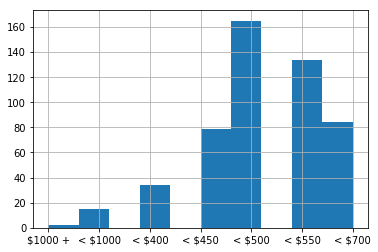

In [110]:
original_data.rent_budget.hist()

Change budget to integer by taking just the numeric values.

In [111]:
original_data.rent_budget = original_data.rent_budget.fillna('< $500')

In [112]:
for ind, budget in enumerate(original_data.rent_budget):
    try:
        budget = str(budget).strip()
        original_data.set_value(ind, 'rent_budget', int(budget[3:]))
#         break
    except:
        continue

In [113]:
original_data

name  gender          hometown  \
0                        Sachin Haldavanekar       0            mumbai   
1                              Sanket Saurav       0             patna   
2                                 Viha Bidre       1        davanagere   
3                            Sougata Dafader       0           kolkata   
4                         Athul Muralidharan       0           chennai   
5                             Megha Suvarna        1         mangalore   
6                                     Vishnu       0         nileshwar   
7                           Srashti Kasliwal       1            indore   
8                                Balakumaran       0         bangalore   
9                                     Pranav       0              pune   
10                      Harshil Navin Dhruve       0         bangalore   
11                      Shravan kumar reddy        0         hyderabad   
12                              Tejas Harish       0         bangalore   
13                               Rohan Taori       0          amravati   
14                                         Z       1                 d   
15                            Mrunal Ghanwat       1              pune   
16                 Varun Sundar Rabindranath       0           chennai   
17                        Kaustubh Shivdikar       0            mumbai   
18                            Pratik Devikar       0            nagpur   
19                              Saumil Patel       0          vadodara   
20                        Keerthan Bharadwaj       0         bangalore   
21                                  Sreejith       0             kochi   
22                           Rushaabh Saliya       0            mumbai   
23                          Srinidhi Shankar       0         bangalore   
24                               Harsh Sheth       0            mumbai   
25                               Nipun Midha       0             sirsa   
26                                     Varad       0              pune   
27                           Chaitanya Joshi       0            mumbai   
28                             Cyril Mathew        0              pune   
29                                  VYOM RAJ       0           lucknow   
..                                       ...     ...               ...   
492                          Harshad Sathaye       0              pune   
493                          Mihir Raichura        0            nagpur   
494                            Manva Pradhan       1          vadodara   
495                           Nikunj Kotecha       0            mumbai   
496                          Akash Tripathi        0                up   
497                          Akshat Karambe        0            mumbai   
498  Shyama Sastha Krishnamoorthy Srinivasan       0           chennai   
499                       Ashutosh Ghildiyal       0          dehradun   
500                             Ayush Shukla       0            indore   
501                             KANDARP VYAS       0          vadodara   
502                    Sai Praneeth Macherla       0         hyderabad   
503                             Dhruv Sharma       0  himachal pradesh   
504                           Patel Parth B.       0           mehsana   
505                            Nishita Sikka       1         jalandhar   
506                               Shiv Desai       0             surat   
507                              Dhruv Patel       0            mumbai   
508                            Siddhika Alve       1            mumbai   
509                                   Mayank       0            indore   
510                              Ajit Manuel       0           chennai   
511                          Abishek Sampath       0             hosur   
512                           Vikram Aditya        0         hyderabad   
513                 Saran Prasad Ambikapathy       0           chennai   
514                     Parmeet Singh Saluja

Temporary function to check null values.

In [114]:
def check_null():
    return(original_data.isnull().sum())

In [116]:
original_data.rent_budget.value_counts()

500        174
550        134
700         84
450         79
400         34
1000        15
$1000 +      2
Name: rent_budget, dtype: int64

In [124]:
for ind, bud in enumerate(original_data.rent_budget):
# try:
#     print(bud)
    if '$1000 +' in str(bud):
            original_data.set_value(ind, 'rent_budget', 1000)

In [125]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science            

#### 11) Alcohol

In [127]:
original_data.alcohol.value_counts()

Flexible        420
Strictly NO      70
Strictly Yes     23
Name: alcohol, dtype: int64

In [128]:
original_data.alcohol = original_data.alcohol.fillna('Flexible')

original_data.alcohol = original_data.alcohol.replace('Flexible', 0)
original_data.alcohol = original_data.alcohol.replace('Strictly NO', 1)
original_data.alcohol = original_data.alcohol.replace('Strictly Yes', 2)

In [130]:
original_data.alcohol.value_counts()

0    429
1     70
2     23
Name: alcohol, dtype: int64

#### 12) Smoking

In [131]:
original_data.smoking.value_counts()

Flexible        288
Strictly No     222
Strictly Yes      3
Name: smoking, dtype: int64

In [132]:
original_data.smoking = original_data.smoking.fillna('Flexible')

original_data.smoking = original_data.smoking.replace('Flexible', 0)
original_data.smoking = original_data.smoking.replace('Strictly No', 1)
original_data.smoking = original_data.smoking.replace('Strictly Yes', 2)

In [134]:
original_data.smoking.value_counts()

0    297
1    222
2      3
Name: smoking, dtype: int64

In [135]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          0
smoking                                          0
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science            

Special preferences does not add anything new of significance at least not uniformly. So dropping it.

In [136]:
original_data = original_data.drop(labels = ['special_pref'], axis = 1)

In [137]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          0
smoking                                          0
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science                              0
MS Computer Systems Engineering

#### 13) Food preferences

In [138]:
original_data.food_pref.value_counts()

Flexible (I prefer  veg or Non -veg for myself but ready to live with anyone)    396
Strictly Veg                                                                      91
Strictly Non Veg                                                                  26
Name: food_pref, dtype: int64

In [139]:
original_data.food_pref = original_data.food_pref.fillna('Flexible (I prefer  veg or Non -veg for myself but ready to live with anyone)')

original_data.food_pref = original_data.food_pref.replace('Flexible (I prefer  veg or Non -veg for myself but ready to live with anyone)', 0)
original_data.food_pref = original_data.food_pref.replace('Strictly Veg', 1)
original_data.food_pref = original_data.food_pref.replace('Strictly Non Veg', 2)

In [140]:
original_data.food_pref.value_counts()

0    405
1     91
2     26
Name: food_pref, dtype: int64

In [141]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          0
smoking                                          0
food_pref                                        0
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science                              0
MS Computer Systems Engineering

#### 14) Cul skills

In [143]:
original_data['cul_skills ']

0        Sometimes
1           Expert
2        Sometimes
3        Sometimes
4        Sometimes
5        Sometimes
6      Never tried
7        Sometimes
8        Sometimes
9        Sometimes
10       Sometimes
11       Sometimes
12       Sometimes
13       Sometimes
14       Sometimes
15       Sometimes
16       Sometimes
17       Sometimes
18       Sometimes
19       Sometimes
20       Sometimes
21       Sometimes
22       Sometimes
23          Expert
24       Sometimes
25       Sometimes
26       Sometimes
27          Expert
28       Sometimes
29       Sometimes
          ...     
492      Sometimes
493      Sometimes
494         Expert
495      Sometimes
496         Expert
497      Sometimes
498      Sometimes
499      Sometimes
500      Sometimes
501      Sometimes
502      Sometimes
503      Sometimes
504      Sometimes
505      Sometimes
506      Sometimes
507      Sometimes
508      Sometimes
509      Sometimes
510      Sometimes
511         Expert
512      Sometimes
513      Som

In [144]:
original_data = original_data.rename(columns={'cul_skills ': 'cul_skills'})

In [145]:
original_data.cul_skills.value_counts()

Sometimes      415
Expert          60
Never tried     31
Name: cul_skills, dtype: int64

In [146]:
original_data.cul_skills = original_data.cul_skills.fillna('Sometimes')

original_data.cul_skills = original_data.cul_skills.replace('Sometimes', 0)
original_data.cul_skills = original_data.cul_skills.replace('Expert', 1)
original_data.cul_skills = original_data.cul_skills.replace('Never tried', 2)

In [148]:
original_data.cul_skills.value_counts()

0    431
1     60
2     31
Name: cul_skills, dtype: int64

In [149]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          0
smoking                                          0
food_pref                                        0
cul_skills                                       0
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science                              0
MS Computer Systems Engineering

In [150]:
original_data.looking_for_roommate.value_counts()

Who can cook sometimes         404
No culinary skills required     95
Name: looking_for_roommate, dtype: int64

In [151]:
original_data.looking_for_roommate = original_data.looking_for_roommate.fillna('Who can cook sometimes')

original_data.looking_for_roommate = original_data.looking_for_roommate.replace('Who can cook sometimes', 0)
original_data.looking_for_roommate = original_data.looking_for_roommate.replace('No culinary skills required', 1)

In [152]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          0
smoking                                          0
food_pref                                        0
cul_skills                                       0
looking_for_roommate                             0
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science                              0
MS Computer Systems Engineering

In [153]:
original_data = original_data.drop(labels = ['hobbies'], axis = 1)

In [154]:
check_null()

name                                           0
gender                                         0
hometown                                       0
current_city                                   0
need_roommate                                  0
open_to_other_branch                           0
work_ex                                        0
dist_from_uni                                  0
apt_type                                       0
rent_budget                                    0
alcohol                                        0
smoking                                        0
food_pref                                      0
cul_skills                                     0
looking_for_roommate                           0
MS Biotechnology                               0
MS Civil Engineering                           0
MS Computer Science                            0
MS Computer Systems Engineering                0
MS Data Science                                0
MS Electrical and Co

In [155]:
original_data

name  gender          hometown  \
0                        Sachin Haldavanekar       0            mumbai   
1                              Sanket Saurav       0             patna   
2                                 Viha Bidre       1        davanagere   
3                            Sougata Dafader       0           kolkata   
4                         Athul Muralidharan       0           chennai   
5                             Megha Suvarna        1         mangalore   
6                                     Vishnu       0         nileshwar   
7                           Srashti Kasliwal       1            indore   
8                                Balakumaran       0         bangalore   
9                                     Pranav       0              pune   
10                      Harshil Navin Dhruve       0         bangalore   
11                      Shravan kumar reddy        0         hyderabad   
12                              Tejas Harish       0         bangalore   
13                               Rohan Taori       0          amravati   
14                                         Z       1                 d   
15                            Mrunal Ghanwat       1              pune   
16                 Varun Sundar Rabindranath       0           chennai   
17                        Kaustubh Shivdikar       0            mumbai   
18                            Pratik Devikar       0            nagpur   
19                              Saumil Patel       0          vadodara   
20                        Keerthan Bharadwaj       0         bangalore   
21                                  Sreejith       0             kochi   
22                           Rushaabh Saliya       0            mumbai   
23                          Srinidhi Shankar       0         bangalore   
24                               Harsh Sheth       0            mumbai   
25                               Nipun Midha       0             sirsa   
26                                     Varad       0              pune   
27                           Chaitanya Joshi       0            mumbai   
28                             Cyril Mathew        0              pune   
29                                  VYOM RAJ       0           lucknow   
..                                       ...     ...               ...   
492                          Harshad Sathaye       0              pune   
493                          Mihir Raichura        0            nagpur   
494                            Manva Pradhan       1          vadodara   
495                           Nikunj Kotecha       0            mumbai   
496                          Akash Tripathi        0                up   
497                          Akshat Karambe        0            mumbai   
498  Shyama Sastha Krishnamoorthy Srinivasan       0           chennai   
499                       Ashutosh Ghildiyal       0          dehradun   
500                             Ayush Shukla       0            indore   
501                             KANDARP VYAS       0          vadodara   
502                    Sai Praneeth Macherla       0         hyderabad   
503                             Dhruv Sharma       0  himachal pradesh   
504                           Patel Parth B.       0           mehsana   
505                            Nishita Sikka       1         jalandhar   
506                               Shiv Desai       0             surat   
507                              Dhruv Patel       0            mumbai   
508                            Siddhika Alve       1            mumbai   
509                                   Mayank       0            indore   
510                              Ajit Manuel       0           chennai   
511                          Abishek Sampath       0             hosur   
512                           Vikram Aditya        0         hyderabad   
513                 Saran Prasad Ambikapathy       0           chennai   
514                     Parmeet Singh Saluja

In [156]:
original_data.to_csv('original_data_no_na.csv')

Drop apt_type since its an extra feature now, and hometown because we'll use just one location indicator(current_city) for now.

In [158]:
original_data = original_data.drop(labels = ['apt_type', 'hometown'], axis = 1)

#### 15) Current City

In [160]:
original_data.current_city.value_counts()

mumbai                  159
bangalore                84
pune                     50
chennai                  27
hyderabad                19
ahmedabad                14
nagpur                   11
vadodara                 10
delhi                     9
indore                    9
navi mumbai               8
thane                     7
india                     7
surat                     5
gurgaon                   5
bengaluru                 5
new delhi                 4
kolkata                   4
mysore                    3
dehradun                  3
goa                       3
noida                     2
solapur                   2
bhopal                    2
coimbatore                2
bangalore, karnataka      2
mumbai, india             2
jalgaon                   2
aurangabad                2
dombivli                  2
                       ... 
nit waranagal             1
zz                        1
bangalore, india          1
banglore                  1
vellore             

Mumbai Bangalore and Pune are the 3 most frequent locations of Masters students in our dataset.

Changing cities to categorical.

In [161]:
all_cities = original_data.current_city.unique()
num_cities = list(range(len(all_cities)))

city_num_dict = dict(zip(all_cities, num_cities))

In [162]:
city_num_dict

{'ahmedabad': 32,
 'ann arbor, michigan': 14,
 'auranagabad': 30,
 'aurangabad': 69,
 'banaglore': 41,
 'bangalore': 1,
 'bangalore, india': 66,
 'bangalore, karnataka': 42,
 'banglore': 79,
 'bengaluru': 22,
 'bhilai, durg': 64,
 'bhopal': 47,
 'bhubaneswar': 72,
 'borivali': 62,
 'boston': 82,
 'chandigarh': 48,
 'chennai': 3,
 'chennaia': 76,
 'coimbatore': 50,
 'dehradun': 17,
 'delhi': 16,
 'delhi ncr': 73,
 'dombivli': 57,
 'dubai': 59,
 'east windsor': 61,
 'faridabad': 43,
 'faridabad(ncr)': 44,
 'goa': 12,
 'guntur': 52,
 'gurgaon': 13,
 'h': 7,
 'hosur': 83,
 'hubli': 75,
 'hyderabad': 5,
 'india': 34,
 'indore': 51,
 'jaipur': 27,
 'jalandhar': 81,
 'jalgaon': 29,
 'kalyan': 60,
 'kerala': 67,
 'kochi': 10,
 'kolkata': 2,
 'mangalore': 26,
 'meerut': 20,
 'miraj': 46,
 'mumbai': 0,
 'mumbai(bandra)': 40,
 'mumbai, india': 58,
 'mysore': 19,
 'nagpur': 6,
 'navi mumbai': 23,
 'navi mumbai (panvel)': 25,
 'nellore': 31,
 'new delhi': 55,
 'nigdi pune': 54,
 'nit waranagal': 56

In [163]:
original_data['current_city'] = original_data['current_city'].map(city_num_dict)

In [164]:
original_data = original_data.drop(labels = ['need_roommate'], axis = 1)

#### 16) Open to other branch

In [165]:
original_data.open_to_other_branch = original_data.open_to_other_branch.replace('Yes', 0)
original_data.open_to_other_branch = original_data.open_to_other_branch.replace('No', 1)

In [166]:
original_data.isnull().sum()

name                                           0
gender                                         0
current_city                                   0
open_to_other_branch                           0
work_ex                                        0
dist_from_uni                                  0
rent_budget                                    0
alcohol                                        0
smoking                                        0
food_pref                                      0
cul_skills                                     0
looking_for_roommate                           0
MS Biotechnology                               0
MS Civil Engineering                           0
MS Computer Science                            0
MS Computer Systems Engineering                0
MS Data Science                                0
MS Electrical and Computer Engineering         0
MS Energy Systems                              0
MS Engineering Management                      0
MS Industrial Engine

Change variable names to make them more accessible.

In [167]:
original_data = original_data.rename(columns = {'1BHK':'bhk_1', '2 BHK':'bhk_2', '3BHK':'bhk_3', '4 BHK':'bhk_4', 'Studio':'studio'})

In [168]:
original_data

name  gender  current_city  \
0                        Sachin Haldavanekar       0             0   
1                              Sanket Saurav       0             1   
2                                 Viha Bidre       1             1   
3                            Sougata Dafader       0             2   
4                         Athul Muralidharan       0             3   
5                             Megha Suvarna        1             4   
6                                     Vishnu       0             1   
7                           Srashti Kasliwal       1             0   
8                                Balakumaran       0             3   
9                                     Pranav       0             4   
10                      Harshil Navin Dhruve       0             0   
11                      Shravan kumar reddy        0             5   
12                              Tejas Harish       0             1   
13                               Rohan Taori       0             6   
14                                         Z       1             7   
15                            Mrunal Ghanwat       1             4   
16                 Varun Sundar Rabindranath       0             3   
17                        Kaustubh Shivdikar       0             8   
18                            Pratik Devikar       0             6   
19                              Saumil Patel       0             9   
20                        Keerthan Bharadwaj       0             1   
21                                  Sreejith       0            10   
22                           Rushaabh Saliya       0             0   
23                          Srinidhi Shankar       0             1   
24                               Harsh Sheth       0             0   
25                               Nipun Midha       0             4   
26                                     Varad       0             4   
27                           Chaitanya Joshi       0             0   
28                             Cyril Mathew        0             4   
29                                  VYOM RAJ       0            11   
..                                       ...     ...           ...   
492                          Harshad Sathaye       0             4   
493                          Mihir Raichura        0             6   
494                            Manva Pradhan       1             9   
495                           Nikunj Kotecha       0             0   
496                          Akash Tripathi        0             0   
497                          Akshat Karambe        0             0   
498  Shyama Sastha Krishnamoorthy Srinivasan       0             1   
499                       Ashutosh Ghildiyal       0            17   
500                             Ayush Shukla       0            51   
501                             KANDARP VYAS       0             9   
502                    Sai Praneeth Macherla       0             5   
503                             Dhruv Sharma       0            16   
504                           Patel Parth B.       0            18   
505                            Nishita Sikka       1            81   
506                               Shiv Desai       0            18   
507                              Dhruv Patel       0             0   
508                            Siddhika Alve       1             0   
509                                   Mayank       0            23   
510                              Ajit Manuel       0            82   
511                          Abishek Sampath       0            83   
512                           Vikram Aditya        0             5   
513                 Saran Prasad Ambikapathy       0             3   
514                     Parmeet Singh Saluja       0            51   
515                     Raghavan Renganathan       0            84   
516                      Ananth Kumar Shetty       0            34   
517                      Ankur Bambharoliya       

In [169]:
original_data.columns

Index(['name', 'gender', 'current_city', 'open_to_other_branch', 'work_ex',
       'dist_from_uni', 'rent_budget', 'alcohol', 'smoking', 'food_pref',
       'cul_skills', 'looking_for_roommate', 'MS Biotechnology',
       'MS Civil Engineering', 'MS Computer Science',
       'MS Computer Systems Engineering', 'MS Data Science',
       'MS Electrical and Computer Engineering', 'MS Energy Systems',
       'MS Engineering Management', 'MS Industrial Engineering',
       'MS Information Assurance and Cyber Security', 'MS Information Systems',
       'MS Mechanical Engineering', 'MS Project Management', 'Others',
       'hall_yes_no', 'max_ppr', 'bhk_1', 'bhk_2', 'bhk_3', 'bhk_4', 'studio'],
      dtype='object')

In [170]:
original_data.dtypes

name                                            object
gender                                           int64
current_city                                     int64
open_to_other_branch                             int64
work_ex                                        float64
dist_from_uni                                  float64
rent_budget                                     object
alcohol                                          int64
smoking                                          int64
food_pref                                        int64
cul_skills                                       int64
looking_for_roommate                             int64
MS Biotechnology                                 int64
MS Civil Engineering                             int64
MS Computer Science                              int64
MS Computer Systems Engineering                  int64
MS Data Science                                  int64
MS Electrical and Computer Engineering           int64
MS Energy 

In [171]:
original_data.rent_budget.value_counts()

500     174
550     134
700      84
450      79
400      34
1000     17
Name: rent_budget, dtype: int64

In [172]:
original_data.rent_budget = pd.to_numeric(original_data.rent_budget)

In [173]:
original_data.rent_budget.value_counts()

500     174
550     134
700      84
450      79
400      34
1000     17
Name: rent_budget, dtype: int64

In [175]:
original_data.dtypes

name                                            object
gender                                           int64
current_city                                     int64
open_to_other_branch                             int64
work_ex                                        float64
dist_from_uni                                  float64
rent_budget                                      int64
alcohol                                          int64
smoking                                          int64
food_pref                                        int64
cul_skills                                       int64
looking_for_roommate                             int64
MS Biotechnology                                 int64
MS Civil Engineering                             int64
MS Computer Science                              int64
MS Computer Systems Engineering                  int64
MS Data Science                                  int64
MS Electrical and Computer Engineering           int64
MS Energy 

#### Save this cleaned data for future use

In [177]:
original_data.to_csv('../Data/user_data_clean.csv')